# Simple Linear Regression and Statistical Computing Skills with R
#### By Josh Houlding <br>
It is important to demonstrate statistical knowledge and practice R or Python programming concepts using datasets from external sources. For this activity, perform the following:

## Task 1
<b>Research the concept of linear regression.</b>

Linear regression is a statistical method useful for modeling and analyzing the linear relationship between one or more predictor variables and a response variable.

## Task 2
<b>Explain the difference between simple and multivariate linear regression.</b>

Simple linear regression only uses one predictor variable to predict the response variable, while multivariate linear regression involves two or more predictors.

## Task 3
<b>Formulate a question that can be answered with simple linear regression.</b>

One potential question that simple linear regression could answer is, <i>Can we predict an individual's weight (kg) based on their height (cm)?</i>

## Task 4
<b>Select a dataset from "UCI Machine Learning Repository," located in the topic Resources. Note: Make sure to select a dataset where the Default Task is labeled 'Regression.' If you are not sure, consult with your instructor.</b>

I selected [this dataset](https://archive.ics.uci.edu/dataset/9/auto+mpg) for predicting the fuel economy of a vehicle in miles per gallon (mpg) based on several factors. 

In [1]:
# Load and transform the data
mpg_data = read.csv("auto-mpg.csv")
names(mpg_data)[names(mpg_data) == "X"] <- "index"
mpg_data <- mpg_data[, c("index", "name", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin", "mpg")]
mpg_data$year <- mpg_data$year + 1900
mpg_data$index <- as.numeric(mpg_data$index)
mpg_data$cylinders <- as.numeric(mpg_data$cylinders)
mpg_data$displacement <- as.numeric(mpg_data$displacement)
mpg_data$horsepower <- as.numeric(mpg_data$horsepower)
mpg_data$weight <- as.numeric(mpg_data$weight)
mpg_data$acceleration <- as.numeric(mpg_data$acceleration)
mpg_data$year <- as.numeric(mpg_data$year)
mpg_data$origin <- as.numeric(mpg_data$origin)
mpg_data$mpg <- as.numeric(mpg_data$mpg)

# View the data
head(mpg_data)

index,name,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
0,chevrolet chevelle malibu,8,307,17,3504,12.0,1970,1,18
1,buick skylark 320,8,350,35,3693,11.5,1970,1,15
2,plymouth satellite,8,318,29,3436,11.0,1970,1,18
3,amc rebel sst,8,304,29,3433,12.0,1970,1,16
4,ford torino,8,302,24,3449,10.5,1970,1,17
5,ford galaxie 500,8,429,42,4341,10.0,1970,1,15


In [2]:
# Install and load packages 
suppressMessages({
    install.packages("pastecs")
    install.packages("e1071")
})
library(pastecs)
library(e1071)

Warning message:
"package 'pastecs' is not available (for R version 3.6.1)"


  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6 1.7-14              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jdh10\AppData\Local\Temp\RtmpyED0FS\downloaded_packages


Warning message:
"package 'pastecs' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"

## Task 5
<b>Identify the independent and dependent variables in the data.</b>

Independent variables: `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `year`, `origin`.<br>
Dependent variable: `mpg`. 

## Task 6
<b>For each variable inspect the dataset, decide: a) whether outliers are present and if yes, make and justify a recommendation on how to handle them; and b) whether the data needs to be cleaned up in some way; explain your rationale.</b>

We will start by looking at a high-level summary of the data to determine if any of the numeric variables look suspicious, as far as outliers are concerned. 

NOTE: Units for the appropriate variables are not provided on the dataset's UCI ML Repository page for some reason. We will assume the following units: 
* `displacement`: $in^{3}$
* `weight`: $lbs$
* `acceleration`: $s$ (seconds to go from 0-60 mph)

In [3]:
# Get summary of data
summary(mpg_data)

     index                    name       cylinders      displacement  
 Min.   :  0.00   ford pinto    :  6   Min.   :3.000   Min.   : 68.0  
 1st Qu.: 99.25   amc matador   :  5   1st Qu.:4.000   1st Qu.:104.2  
 Median :198.50   ford maverick :  5   Median :4.000   Median :148.5  
 Mean   :198.50   toyota corolla:  5   Mean   :5.455   Mean   :193.4  
 3rd Qu.:297.75   amc gremlin   :  4   3rd Qu.:8.000   3rd Qu.:262.0  
 Max.   :397.00   amc hornet    :  4   Max.   :8.000   Max.   :455.0  
                  (Other)       :369                                  
   horsepower        weight      acceleration        year          origin     
 Min.   : 1.00   Min.   :1613   Min.   : 8.00   Min.   :1970   Min.   :1.000  
 1st Qu.:26.00   1st Qu.:2224   1st Qu.:13.82   1st Qu.:1973   1st Qu.:1.000  
 Median :60.50   Median :2804   Median :15.50   Median :1976   Median :1.000  
 Mean   :51.39   Mean   :2970   Mean   :15.57   Mean   :1976   Mean   :1.573  
 3rd Qu.:79.00   3rd Qu.:3608   3rd Q

None of the variables have values that seem implausible, with the possible exception of `displacement`. We will look at a histogram of this variable to see if the distribution is appropriate. 

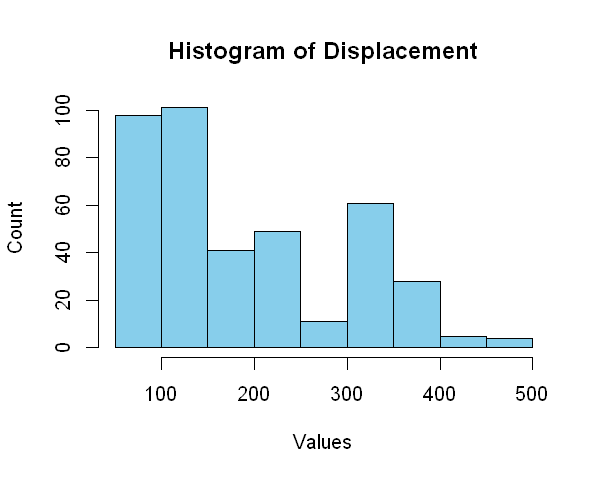

In [4]:
# View histogram of 'displacement'
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$displacement, main="Histogram of Displacement", xlab="Values", ylab="Count", col="skyblue", border="black")

This distribution seems reasonable, as most cars are toward the lower end of power and thus displace relatively small volumes of air in their engines. The number of extreme observations (>400) is small enough that outliers will not significantly affect the analysis. 

## Tasks 7, 8, 9, and 10
7. <b>For each variable, explain, calculate, visualize, and interpret the measures of central tendency.</b>
8. <b>For each variable, explain, calculate, visualize, and interpret the measures of dispersion.</b>
9. <b>For each variable, explain, calculate, visualize, and interpret skewness and kurtosis.</b>
10. <b>For each variable, create a histogram depicting the frequency distribution and interpret the plot.</b>

We have already computed some measures of central tendency above, but let's do it for each numeric variable individually so we can explore them more thoroughly. We will also examine their measures of dispersion, skewness and kurtosis, and distributions all in one place for convenience. 

### Variable `cylinders`

In [5]:
# Find measures of central tendency for `cylinders`
summary(mpg_data$cylinders)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   5.455   8.000   8.000 

Some cars in the data have as few as 3 cylinders, while some have as many as 8. The median number of cylinders is 4, suggesting that the 'typical' car is a v4. 

In [6]:
# Find measures of dispersion for `cylinders`
cat("Variance: ", var(mpg_data$cylinders), "\n")
cat("Standard deviation: ", sd(mpg_data$cylinders), "\n")

Variance:  2.893415 
Standard deviation:  1.701004 


We see approximately the variance and standard deviation we would expect, not unexpectedly large. 

In [7]:
# Find skewness and kurtosis for `cylinders`
cat("Skewness: ", skewness(mpg_data$cylinders), "\n")
cat("Kurtosis: ", kurtosis(mpg_data$cylinders), "\n")

Skewness:  0.5229564 
Kurtosis:  -1.382624 


The skewness of `cylinders` suggests a distribution that is skewed to the right, while the kurtosis shows us that the distribution has longer tails and a sharper peak than a normal distribution. Let's look at that distribution: 

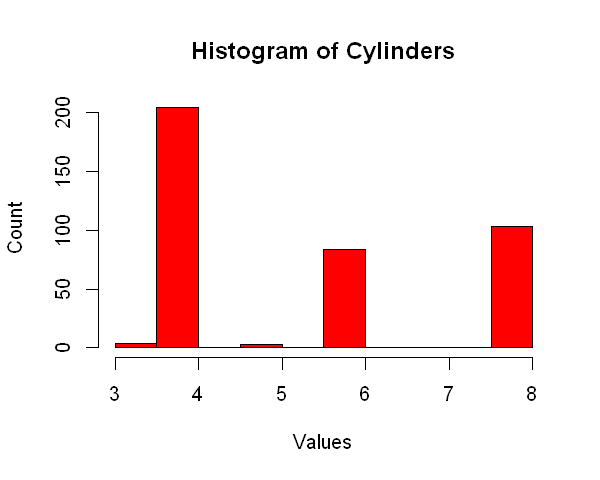

In [8]:
# Show histogram for `cylinders`
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$cylinders, main="Histogram of Cylinders", xlab="Values", ylab="Count", col="red", border="black")

As expected, most cars have around 4 cylinders, with a significant amount also having 6 or 8. 

### Variable `displacement`

In [9]:
# Find measures of central tendency for `displacement`
summary(mpg_data$displacement)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   68.0   104.2   148.5   193.4   262.0   455.0 

There is a massive delta between engine displacements in the data, with the most powerful engine having over 6x the displacement potential of the weakest. However, the median vehicle has a modest 148.5 $in^{3}$ of displacement power, suggesting that most vehicles skew toward the lower end. This is confirmed by median being significantly lower than the mean. 

In [10]:
# Find measures of dispersion for `displacement`
cat("Variance: ", var(mpg_data$displacement), "\n")
cat("Standard deviation: ", sd(mpg_data$displacement), "\n")

Variance:  10872.2 
Standard deviation:  104.2698 


We see a very large variance and standard deviation, suggesting there is considerable diversity in `displacement` values. 

In [11]:
# Find skewness and kurtosis for `displacement`
cat("Skewness: ", skewness(mpg_data$displacement), "\n")
cat("Kurtosis: ", kurtosis(mpg_data$displacement), "\n")

Skewness:  0.7142298 
Kurtosis:  -0.7635686 


As with the previous variable, we see that the distribution is skewed to the right and has a sharper peak than a normal distribution. 

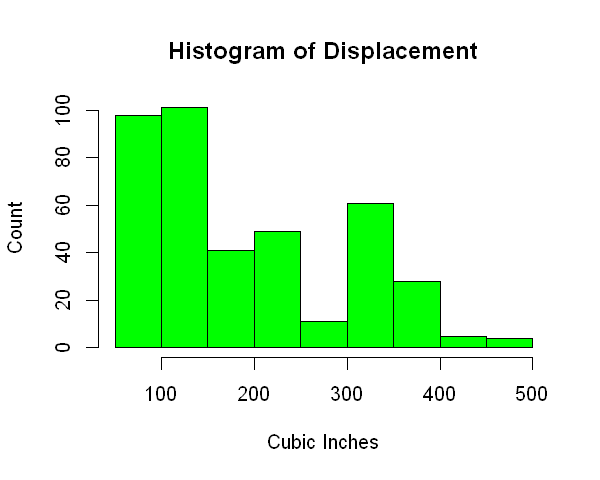

In [12]:
# Show histogram for `displacement`
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$displacement, main="Histogram of Displacement", xlab="Cubic Inches", ylab="Count", col="green", border="black")

As we saw earlier, most cars have relatively low displacement values, with a significant amount sitting in the 300-400 range as well. 

### Variable `horsepower`

In [13]:
# Find measures of central tendency for `horsepower`
summary(mpg_data$horsepower)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   26.00   60.50   51.39   79.00   94.00 

The median car has about 60 horsepower, which is weak by today's standards. However, we see that the median is higher than the mean, suggesting there are lots of underpowered cars at the lower end of the spectrum dragging down the mean. 

In [14]:
# Find measures of dispersion for `horsepower`
cat("Variance: ", var(mpg_data$horsepower), "\n")
cat("Standard deviation: ", sd(mpg_data$horsepower), "\n")

Variance:  895.9462 
Standard deviation:  29.93236 


We see a large standard deviation, implying a wide distribution of horsepowers. 

In [15]:
# Find skewness and kurtosis for `horsepower`
cat("Skewness: ", skewness(mpg_data$horsepower), "\n")
cat("Kurtosis: ", kurtosis(mpg_data$horsepower), "\n")

Skewness:  -0.28674 
Kurtosis:  -1.341286 


The negative skewness value suggests a left-skewed distribution, and the positive kurtosis implies longer tails and a sharp peak. 

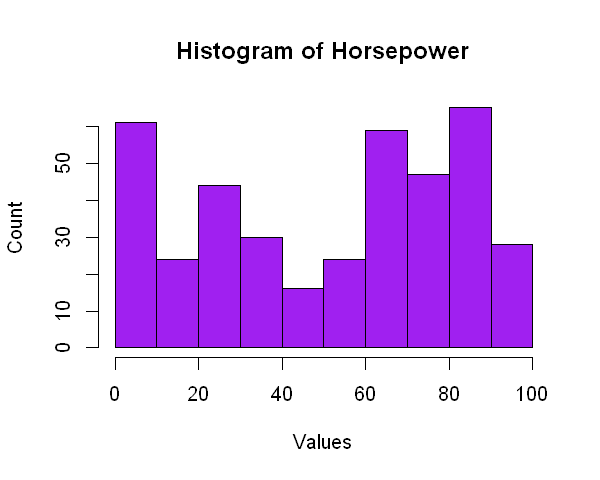

In [16]:
# Show histogram for `horsepower`
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$horsepower, main="Histogram of Horsepower", xlab="Values", ylab="Count", col="purple", border="black")

We see a distribution that looks almost like an upward-opening parabola, with high numbers of vehicles falling in the 20-40 and 60-90 range. 

### Variable `weight`

In [17]:
# Find measures of central tendency for `weight`
summary(mpg_data$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1613    2224    2804    2970    3608    5140 

We see that the mean and median weights are pretty close, centered at around 2,900 lbs. The heaviest vehicle in the data is 5,140 lbs, putting it around the typical pickup truck in weight. 

In [18]:
# Find measures of dispersion for `weight`
cat("Variance: ", var(mpg_data$weight), "\n")
cat("Standard deviation: ", sd(mpg_data$weight), "\n")

Variance:  717141 
Standard deviation:  846.8418 


We see a moderate standard deviation in weight. 

In [19]:
# Find skewness and kurtosis for `weight`
cat("Skewness: ", skewness(mpg_data$weight), "\n")
cat("Kurtosis: ", kurtosis(mpg_data$weight), "\n")

Skewness:  0.5270662 
Kurtosis:  -0.8018206 


We have a right-skewed distribution with a high peak. 

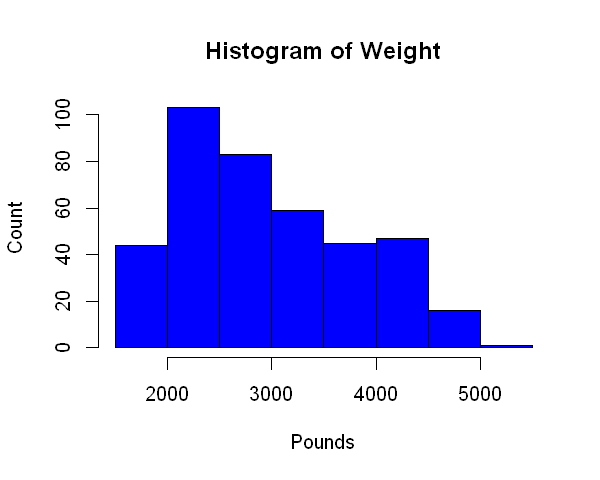

In [20]:
# Show histogram for `weight`
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$weight, main="Histogram of Weight", xlab="Pounds", ylab="Count", col="blue", border="black")

Most vehicles are betwen 2,000 and 3,000 lbs, with most outside that range being heavier. 

### Variable `acceleration`

In [21]:
# Find measures of central tendency for `acceleration`
summary(mpg_data$acceleration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   13.82   15.50   15.57   17.18   24.80 

The mean and median acceleration times are almost equal, suggesting a normal distribution. 

In [22]:
# Find measures of dispersion for `acceleration`
cat("Variance: ", var(mpg_data$acceleration), "\n")
cat("Standard deviation: ", sd(mpg_data$acceleration), "\n")

Variance:  7.604848 
Standard deviation:  2.757689 


The variance and standard deviation are about what we would expect. 

In [23]:
# Find skewness and kurtosis for `acceleration`
cat("Skewness: ", skewness(mpg_data$acceleration), "\n")
cat("Kurtosis: ", kurtosis(mpg_data$acceleration), "\n")

Skewness:  0.276679 
Kurtosis:  0.3821477 


We have a slightly right-skewed distribution with a sharp peak. 

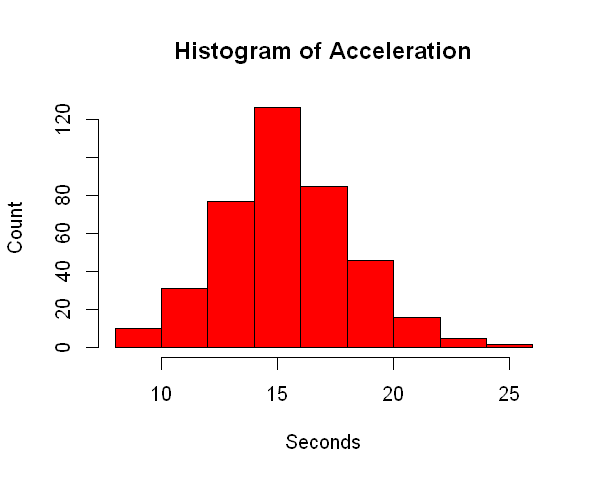

In [24]:
# Show histogram for `acceleration`
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$acceleration, main="Histogram of Acceleration", xlab="Seconds", ylab="Count", col="red", border="black")

We see a nearly perfect normal distribution centered at about 15 seconds, with a slightly longer right tail. 

### Variable `year`

In [25]:
# Find measures of central tendency for `year`
summary(mpg_data$year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1970    1973    1976    1976    1979    1982 

The oldest vehicle in the data is from 1970, and the newest is from 1982. The typical vehicle is from 1976. 

In [26]:
# Find measures of dispersion for `year`
cat("Variance: ", var(mpg_data$year), "\n")
cat("Standard deviation: ", sd(mpg_data$year), "\n")

Variance:  13.67244 
Standard deviation:  3.697627 


The variance and standard deviation are about what we would expect. 

In [27]:
# Find skewness and kurtosis for `year`
cat("Skewness: ", skewness(mpg_data$year), "\n")
cat("Kurtosis: ", kurtosis(mpg_data$year), "\n")

Skewness:  0.0114478 
Kurtosis:  -1.190609 


We have a nearly symmetrical distribution with heavy tails. 

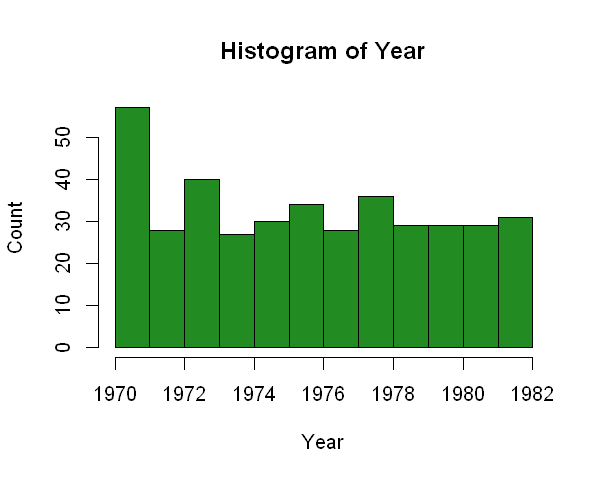

In [28]:
# Show histogram for `year`
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$year, main="Histogram of Year", xlab="Year", ylab="Count", col="forestgreen", border="black")

Coinciding with our skewness and kurtosis values, we see a nearly uniform distribution, with a slight peak around 1970, which suggests that many of the cars in the dataset are at the older end of years present in the data. 

We will be skipping analysis of the variable `origin`, because the UCI ML Repository page does not explain what it represents. 

### Variable `mpg`

In [29]:
# Find measures of central tendency for `mpg`
summary(mpg_data$mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   17.50   23.00   23.51   29.00   46.60 

The mean and median are close, suggesting no significant skew, and the maximum mileage is over 46 mpg, which is surprising for a vehicle manufactured between 1970 and 1982. 

In [30]:
# Find measures of dispersion for `mpg`
cat("Variance: ", var(mpg_data$mpg), "\n")
cat("Standard deviation: ", sd(mpg_data$mpg), "\n")

Variance:  61.08961 
Standard deviation:  7.815984 


The variance and standard deviation are unsurprising. 

In [31]:
# Find skewness and kurtosis for `mpg`
cat("Skewness: ", skewness(mpg_data$mpg), "\n")
cat("Kurtosis: ", kurtosis(mpg_data$mpg), "\n")

Skewness:  0.4536269 
Kurtosis:  -0.5318741 


We see that the distribution is likely right-skewed with a sharp peak. 

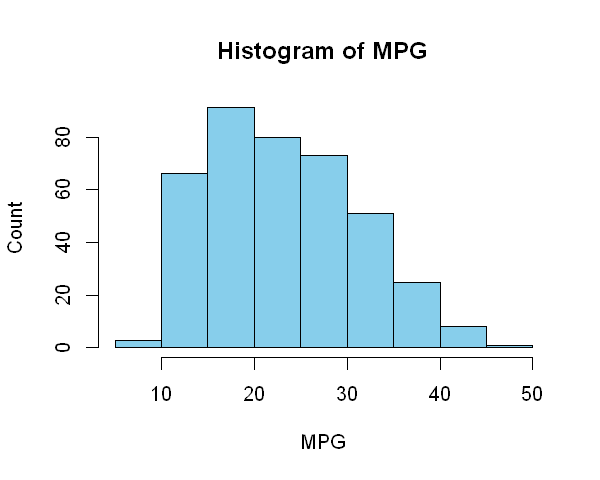

In [32]:
# Show histogram for `mpg`
options(repr.plot.width=5, repr.plot.height=4)
hist(mpg_data$mpg, main="Histogram of MPG", xlab="MPG", ylab="Count", col="skyblue", border="black")

We see a distribution that looks vaguely normal, with a significant right skew. 

## Tasks 11, 12, and 13
11. <b>Perform simple linear regression in R or Python, using the appropriate variable(s) from the dataset you downloaded.</b>
12. <b>Display the results and include plots you think are necessary to support your findings.</b>
13. <b>Interpret the results.</b>

We will be performing SLR in R to determine how much of an effect a vehicle's horsepower has on its fuel economy (mpg). 
* Predictor variable: `horsepower`
* Response variable: `mpg`

In [33]:
# Get subset of data 
horsepower_mpg <- mpg_data[, c("horsepower", "mpg")]
head(horsepower_mpg)

horsepower,mpg
17,18
35,15
29,18
29,16
24,17
42,15


In [34]:
# Train model 
model <- lm(mpg ~ horsepower, data = horsepower_mpg)

# Get summary of model
summary(model)


Call:
lm(formula = mpg ~ horsepower, data = horsepower_mpg)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3709  -5.9894  -0.4078   4.9695  22.9325 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.8574     0.7074  25.243   <2e-16 ***
horsepower    0.1101     0.0119   9.252   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.096 on 396 degrees of freedom
Multiple R-squared:  0.1777,	Adjusted R-squared:  0.1757 
F-statistic:  85.6 on 1 and 396 DF,  p-value: < 2.2e-16


We get a model equation of $m = 17.86 + 0.11h$, where $m$ is mileage and $h$ is horsepower. Contrary to my expectations, the model suggests that vehicles with higher-horsepower engines get better fuel economy, which seems counterintuitive. To be more specific, a 1-unit increase in a vehicle's horsepower will increase its fuel economy by ~0.11 mpg, on average. 

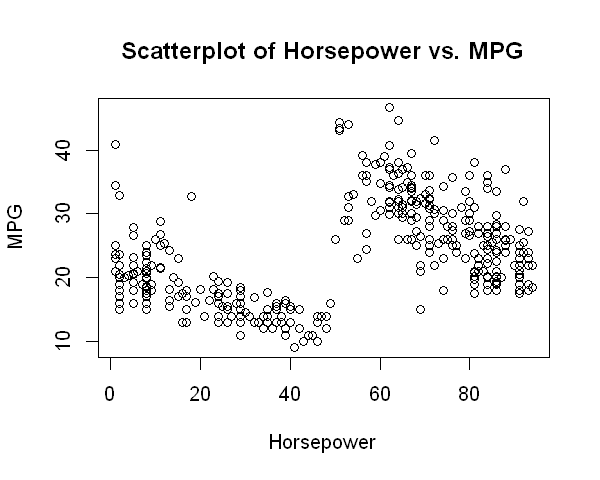

In [35]:
# Create scatterplot with linear regression line
plot(horsepower_mpg$horsepower, horsepower_mpg$mpg, 
     xlab = "Horsepower", ylab = "MPG",
     main = "Scatterplot of Horsepower vs. MPG")

When we look at the scatterplot, we see a very different picture. We see data points split into two clusters, with each cluster displaying a negative trend, which fits with common sense that MPG decreases with increasing horsepower. This highlights the importance of looking at a plot to see what is really going on, since one regression line through all this data will obviously have a positive slope, even though that does not fit the data in reality. 